In [1]:
#Standard imports

import pandas as pd
import numpy as np

In [2]:
#Imports for webscraping

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

import time as t
import os

import requests
from bs4 import BeautifulSoup

In [3]:
#NLP tokens for processing

import unicodedata
import re
import json
import nltk

import spacy

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [4]:
#Sentiment Analysis

import nltk.sentiment

In [5]:
#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
players = ['Patrick Mahomes',
'Justin Herbert',
'Tom Brady',
'Kirk Cousins',
'Joe Burrow',
'Jared Goff',
'Josh Allen',
'Geno Smith',
'Trevor Lawrence',
'Jalen Hurts',
'Aaron Rodgers',
'Tua Tagovailoa',
'Russell Wilson',
'Derek Carr',
'Daniel Jones',
'Davis Mills',
'Matt Ryan',
'Mac Jones',
'Andy Dalton',
'Dak Prescott',
'Jacoby Brissett',
'Ryan Tannehill',
'Jimmy Garoppolo',
'Kenny Pickett',
'Kyler Murray',
'Lamar Jackson',
'Justin Fields',
'Marcus Mariota',
'Baker Mayfield',
'Matthew Stafford',
'Taylor Heinicke',
'Carson Wentz',
'Zach Wilson',
'Brock Purdy',
'Mitchell Trubisky',
'Mike White',
'Sam Darnold',
'Deshaun Watson',
'Cooper Rush',
'Joe Flacco',
'Tom Brady',
'Justin Herbert',
'Matthew Stafford',
'Patrick Mahomes',
'Derek Carr',
'Joe Burrow',
'Dak Prescott',
'Josh Allen',
'Kirk Cousins',
'Aaron Rodgers',
'Matt Ryan',
'Jimmy Garoppolo',
'Mac Jones',
'Kyler Murray',
'Ben Roethlisberger',
'Ryan Tannehill',
'Trevor Lawrence',
'Carson Wentz',
'Taylor Heinicke',
'Jared Goff',
'Jalen Hurts',
'Russell Wilson',
'Teddy Bridgewater',
'Baker Mayfield',
'Lamar Jackson',
'Davis Mills',
'Tua Tagovailoa',
'Sam Darnold',
'Daniel Jones',
'Zach Wilson',
'Justin Fields',
'Andy Dalton',
'Jacoby Brissett',
'Jameis Winston',
'Trevor Siemian',
'Tyler Huntley',
'Tyrod Taylor',
'Mike Glennon',
'Deshaun Watson',
'Patrick Mahomes',
'Tom Brady',
'Matt Ryan',
'Josh Allen',
'Justin Herbert',
'Aaron Rodgers',
'Kirk Cousins',
'Russell Wilson',
'Philip Rivers',
'Derek Carr',
'Matthew Stafford',
'Kyler Murray',
'Jared Goff',
'Ryan Tannehill',
'Ben Roethlisberger',
'Teddy Bridgewater',
'Baker Mayfield',
'Daniel Jones',
'Drew Brees',
'Drew Lock',
'Lamar Jackson',
'Joe Burrow',
'Cam Newton',
'Carson Wentz',
'Nick Mullens',
'Gardner Minshew',
'Sam Darnold',
'Andy Dalton',
'Ryan Fitzpatrick',
'Mitchell Trubisky',
'Dak Prescott',
'Nick Foles',
'Tua Tagovailoa',
'Alex Smith',
'Dwayne Haskins',
'Jimmy Garoppolo',
'Mike Glennon',
'Jalen Hurts',
'Brandon Allen',
'Joe Flacco',
'Jameis Winston',
'Dak Prescott',
'Jared Goff',
'Philip Rivers',
'Matt Ryan',
'Russell Wilson',
'Tom Brady',
'Derek Carr',
'Carson Wentz',
'Patrick Mahomes',
'Aaron Rodgers',
'Jimmy Garoppolo',
'Deshaun Watson',
'Baker Mayfield',
'Kyler Murray',
'Kirk Cousins',
'Ryan Fitzpatrick',
'Andy Dalton',
'Kyle Allen',
'Gardner Minshew',
'Mitchell Trubisky',
'Lamar Jackson',
'Josh Allen',
'Daniel Jones',
'Sam Darnold',
'Drew Brees',
'Jacoby Brissett',
'Ryan Tannehill',
'Matthew Stafford',
'Joe Flacco',
'Mason Rudolph',
'Case Keenum',
'Teddy Bridgewater',
'Dwayne Haskins',
'Marcus Mariota',
'Devlin Hodges',
'Eli Manning',
'Drew Lock',
'David Blough',
'Ben Roethlisberger',
'Patrick Mahomes',
'Matt Ryan',
'Jared Goff',
'Andrew Luck',
'Aaron Rodgers',
'Tom Brady',
'Philip Rivers',
'Eli Manning',
'Kirk Cousins',
'Deshaun Watson',
'Derek Carr',
'Drew Brees',
'Case Keenum',
'Dak Prescott',
'Matthew Stafford',
'Baker Mayfield',
'Russell Wilson',
'Cam Newton',
'Mitchell Trubisky',
'Carson Wentz',
'Jameis Winston',
'Sam Darnold',
'Blake Bortles',
'Andy Dalton',
'Marcus Mariota',
'Joe Flacco',
'Ryan Fitzpatrick',
'Josh Rosen',
'Nick Mullens',
'Alex Smith',
'Josh Allen',
'Ryan Tannehill',
'Nick Foles',
'C.J. Beathard',
'Brock Osweiler',
'Lamar Jackson',
'Jeff Driskel',
'Cody Kessler',
'Tom Brady',
'Philip Rivers',
'Matthew Stafford',
'Drew Brees',
'Ben Roethlisberger',
'Matt Ryan',
'Kirk Cousins',
'Alex Smith',
'Russell Wilson',
'Jared Goff',
'Blake Bortles',
'Case Keenum',
'Jameis Winston',
'Derek Carr',
'Eli Manning',
'Dak Prescott',
'Andy Dalton',
'Cam Newton',
'Carson Wentz',
'Marcus Mariota',
'Joe Flacco',
'Jacoby Brissett',
'Josh McCown',
'DeShone Kizer',
'Tyrod Taylor',
'Jay Cutler',
'Trevor Siemian',
'Mitchell Trubisky',
'Carson Palmer',
'Brett Hundley',
'Deshaun Watson',
'Aaron Rodgers',
'Jimmy Garoppolo',
'C.J. Beathard',
'Tom Savage',
'Brian Hoyer',
'Ryan Fitzpatrick',
'Brock Osweiler',
'Blaine Gabbert',
'Drew Stanton',
'Mike Glennon',
'Drew Brees',
'Matt Ryan',
'Kirk Cousins',
'Aaron Rodgers',
'Philip Rivers',
'Joe Flacco',
'Matthew Stafford',
'Andrew Luck',
'Carson Palmer',
'Russell Wilson',
'Andy Dalton',
'Jameis Winston',
'Eli Manning',
'Derek Carr',
'Blake Bortles',
'Sam Bradford',
'Ben Roethlisberger',
'Carson Wentz',
'Dak Prescott',
'Tom Brady',
'Cam Newton',
'Alex Smith',
'Marcus Mariota',
'Trevor Siemian',
'Tyrod Taylor',
'Ryan Tannehill',
'Brock Osweiler',
'Ryan Fitzpatrick',
'Colin Kaepernick',
'Case Keenum',
'Matt Barkley',
'Brian Hoyer',
'Cody Kessler',
'Josh McCown',
'Jared Goff',
'Jay Cutler',
'Blaine Gabbert',
'Robert Griffin III',
'Bryce Petty']


In [7]:
len(players)

277

In [8]:
len(set(players))

85

In [9]:
unique_players = set(players)

In [ ]:
# for x in cap.year:
#     if x > 2021:
#         print('2021')
#     else:
#         print(x)
        
# query = f'Can you give me around a 5,000 word essay about NFL quarterback {cap.name} and his performance during the {cap.year} season? Write about his good points and bad points, to include health, injuries, prospects, etc.'

In [ ]:
# driver = webdriver.Chrome(service = Service())

In [ ]:
# unique_player = 'Lamar Jackson'
# player = f'"{unique_player}" performance' 

# #To get to the list of results

# driver.get("https://www.sportskeeda.com/find")
# driver.find_element(By.NAME, 'search').send_keys(player)
# driver.find_element(By.XPATH, '//button').click()
# t.sleep(2)

In [ ]:
#Getting links for web results (i.e. NOT ad-sponsored links)

#driver.find_elements(By.XPATH, '//div[@class="gsc-results gsc-webResult"]') #All web results
# elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')

In [23]:
unique_players = list(set(players))

In [37]:
unique_players[4]

'Case Keenum'

In [48]:
def get_pigskin_nlp(players):
    players_df = pd.DataFrame({})
    driver = webdriver.Chrome(service = Service())
    for player in players:
        query = f'"{player}" performance health' 
        
        driver.get("https://www.sportskeeda.com/find")
        driver.find_element(By.NAME, 'search').send_keys(query)
        driver.find_element(By.XPATH, '//button').click()
        t.sleep(2)
        
        elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')
        
        bag_of_words = []

        for element in elements:
            if element.get_attribute('href') is not None:
                link = element.get_attribute('href')
                t.sleep(2)
                response = requests.get(link)
                soup = BeautifulSoup(response.content, 'html.parser')
                title = soup.title.string
                print(link)
                if soup.find('div', class_='keeda_widget') is not None:
                    content = soup.find('div', class_='keeda_widget').text.replace('\n', ' ')
                    
                    sep = 'Recommended Video'
                
                    content = content.split(sep, 1)[0]
                    
                    words = f'{title} {content}'
                    
                    bag_of_words.append(words)
           
         #Second page
        
#         t.sleep(5)
#         driver.get("https://www.sportskeeda.com/find")
#         t.sleep(5)
#         driver.find_element(By.NAME, 'search').send_keys(query)
#         driver.find_element(By.XPATH, '//button').click()
#         t.sleep(3)
        
#         if len(driver.find_elements(By.XPATH, '//div[@aria-label="Page 2"]')) > 0:
#             t.sleep(2)
#             driver.find_element(By.XPATH, '//div[@aria-label="Page 2"]').click()
#             t.sleep(2)
#             elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')
        
#             for element in elements:
#                 if element.get_attribute('href') is not None:
#                     link = element.get_attribute('href')
#                     t.sleep(2)
#                     response = requests.get(link)
#                     soup = BeautifulSoup(response.content, 'html.parser')
#                     title = soup.title.string
#                     print(link)
#                     if soup.find('div', class_='keeda_widget') is not None:
#                         content = soup.find('div', class_='keeda_widget').text.replace('\n', ' ')
                        
#                         sep = 'Recommended Video'
                    
#                         content = content.split(sep, 1)[0]
                        
#                         words = f'{title} {content}'
                        
#                         bag_of_words.append(words)
        
#         #Third page
        
#         t.sleep(5)
#         driver.get("https://www.sportskeeda.com/find")
#         t.sleep(5)
#         driver.find_element(By.NAME, 'search').send_keys(query)
#         driver.find_element(By.XPATH, '//button').click()
#         t.sleep(2)
        
#         if len(driver.find_elements(By.XPATH, '//div[@aria-label="Page 3"]')) > 0:
#             t.sleep(2)
#             driver.find_element(By.XPATH, '//div[@aria-label="Page 3"]').click()
#             t.sleep(2)
#             elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')
        
#             for element in elements:
#                 if element.get_attribute('href') is not None:
#                     link = element.get_attribute('href')
#                     t.sleep(2)
#                     response = requests.get(link)
#                     soup = BeautifulSoup(response.content, 'html.parser')
#                     title = soup.title.string
#                     print(link)
#                     if soup.find('div', class_='keeda_widget') is not None:
#                         content = soup.find('div', class_='keeda_widget').text.replace('\n', ' ')
                        
#                         sep = 'Recommended Video'
                    
#                         content = content.split(sep, 1)[0]
                        
#                         words = f'{title} {content}'
                        
#                         bag_of_words.append(words)
        
        player_info = pd.DataFrame({'player_name': [player],
                                   'player_commentary': [bag_of_words]})
        
        players_df = pd.concat([players_df, player_info], ignore_index=True)
    
    driver.quit()
    
    return players_df

In [94]:
test_df_2 = get_pigskin_nlp(unique_players)

https://www.sportskeeda.com/nfl/news-colin-cowherd-feels-cooper-rush-far-away-dak-prescott-cowboys-qb1
https://www.sportskeeda.com/nfl/does-cowboys-backup-qb-cooper-rush-takes-replace-dak-prescott-2023
https://www.sportskeeda.com/nfl/news-nfl-analyst-claims-cooper-rush-lost-starting-job-sunday-night-football
https://www.sportskeeda.com/nfl/news-cooper-rush-shines-cowboys-win-commanders
https://www.sportskeeda.com/nfl/cooper-rush-contract
https://www.sportskeeda.com/nfl/news-skip-bayless-slams-dak-prescott-s-performance-loss-vs-tom-brady-buccaneers
https://www.sportskeeda.com/nfl/who-starting-qb-dallas-cowboys-week-7
https://www.sportskeeda.com/nfl/news-skip-bayless-words-dak-prescott
https://www.sportskeeda.com/nfl/news-what-happened-dak-prescott-cowboys-qb-suffered-painful-injury-win-vs-titans-tnf
https://www.sportskeeda.com/nfl/news-no-reason-cowboys-kick-tires-colin-kaepernick-nfl-fans-urge-jerry-jones-sign-qb-dak-prescott-s-injury
https://www.sportskeeda.com/nfl/carson-wentz-nfl-fa

https://www.sportskeeda.com/nfl/5-potential-dark-horse-2022-nfl-mvp-award
https://www.sportskeeda.com/nfl/the-new-nfl-season-well-truly-underway-host-teams-perfect-starts-new-campaign-others-sent-back-drawing-board-poor-performances
https://www.sportskeeda.com/nfl/news-is-joe-flacco-still-playing-football-2022-nfl-season
https://www.sportskeeda.com/nfl/news-jets-fans-demand-joe-flacco-replace-zach-wilson-qb1-sophomore-qb-left-teammates-high-dry-loss-vs-patriots
https://www.sportskeeda.com/nfl/tyler-conklin-s-week-9-fantasy-outlook
https://www.sportskeeda.com/nfl/5-nfl-qbs-league-2023-feat-carson-wentz
https://www.sportskeeda.com/nfl/are-philadelphia-eagles-still-unsure-qb-jalen-hurts-philadelphia-trades-jacksonville-qb-gardner-minshew
https://www.sportskeeda.com/nfl/shannon-sharpe-twitter-burn-puts-jets-qb-blast-horror-tnf-loss-vs-jaguars
https://www.sportskeeda.com/nfl/tom-brady-biggest-playoff-loss-nfl-career
https://www.sportskeeda.com/nfl/why-zach-wilson-benched-what-say-week-11-po

https://www.sportskeeda.com/nfl/news-why-jalen-hurts-hail-mary-pass-woefully-short-video-shows-real-reason-behind-eagles-qb-s-weak-attempt
https://www.sportskeeda.com/nfl/jalen-hurts-vs-brock-purdy-the-nfc-championship-game
https://www.sportskeeda.com/nfl/jalen-hurts-contract
https://www.sportskeeda.com/nfl/are-philadelphia-eagles-still-unsure-qb-jalen-hurts-philadelphia-trades-jacksonville-qb-gardner-minshew
https://www.sportskeeda.com/nfl/5-takeaways-pittsburgh-steelers-win-philadelphia-eagles-nfl-preseason
https://www.sportskeeda.com/nfl/nfl-fantasy-league-2020-week-15-best-rbs-potentially-still-lurking-free-agency
https://www.sportskeeda.com/nfl/rumors-nfl-trade-deadline-predictions-3-moves-browns-could-make
https://www.sportskeeda.com/nfl/what-is-aaron-rodgers-record-after-loss-since-matt-lefleur-became-green-bay-packers-head-coach
https://www.sportskeeda.com/nfl/aaron-rodgers-heaps-praise-certain-browns-player
https://www.sportskeeda.com/nfl/nfl-2020-defense-rankings
https://www.

https://www.sportskeeda.com/nfl/nfl-fantasy-football-week-8-quarterback-rankings-1
https://www.sportskeeda.com/nfl/is-antonio-gibson-playing-tonight-giants
https://www.sportskeeda.com/nfl/news-why-carson-wentz-playing-tonight-reason-former-eagles-qb-benched-commanders
https://www.sportskeeda.com/nfl/news-who-won-nfl-game-last-night-result-score-sunday-night-football-ft-cowboys-wft
https://www.sportskeeda.com/nfl/news-without-a-doubt-overrated-qb-going-nowhere-dak-cowboys-fans-slam-qb-horrendous-performance-vs-commanders-big-loss
https://www.sportskeeda.com/nfl/news-lecanceled-supporting-sexual-predators-lebron-james-celebrates-deshaun-watson-s-performance-gets-slammed-nfl-fans
https://www.sportskeeda.com/nfl/news-is-justin-fields-playing-tonight-vs-new-york-jets-week-12-fantasy-outlook-bears-qb
https://www.sportskeeda.com/nfl/news-did-tua-tagovailoa-suffer-another-concussion-vs-packers-fan-presents-evidence-dolphins-qb-suffered-head-injury
https://www.sportskeeda.com/nfl/news-nfl-tikto

https://www.sportskeeda.com/nfl/jimmy-garoppolo-girlfriend
https://www.sportskeeda.com/nfl/news-that-a-s-kicking-joy-taylor-praises-brock-purdy-dominant-outing-tom-brady
https://www.sportskeeda.com/pop-culture/news-moonfall-red-carpet-breaking-one-joey-king-s-hottest-looks-yet
https://www.sportskeeda.com/baseball/news-jeremy-pena-hyped-fans-texans-vs-browns-game-h-town-love-first-football-game-books
https://www.sportskeeda.com/pop-culture/what-time-will-rosaline-air-hulu-release-date-plot-kaitlyn-dever-s-romcom
https://www.sportskeeda.com/pop-culture/what-time-will-the-greatest-beer-run-ever-air-apple-tv-release-date-plot-details-zac-efron-s-action-comedy
https://www.sportskeeda.com/pop-culture/rosaline-film-review-the-hulu-film-abrupt-seems-tokenistic-refreshing
https://www.sportskeeda.com/nfl/what-is-aaron-rodgers-record-after-loss-since-matt-lefleur-became-green-bay-packers-head-coach
https://www.sportskeeda.com/pop-culture/a-haunting-venice-release-date-trailer-cast-everything-know

https://www.sportskeeda.com/nfl/jimmy-garoppolo-make-3-teams-contenders
https://www.sportskeeda.com/tennis/eugenie-bouchard-net-worth
https://www.sportskeeda.com/nfl/news-shannon-sharpe-claims-tom-brady-s-coaches-chopping-block-loss-panthers-they-re-come-you
https://www.sportskeeda.com/nfl/news-anthony-richardson-vs-cam-newton-comparing-gators-qb-s-combine-performance-former-auburn-star
https://www.sportskeeda.com/nfl/antonio-brown-ran-wrong-route-touchdown-catch
https://www.sportskeeda.com/nfl/ranking-10-worst-nfl-qbs-2010s
https://www.sportskeeda.com/nfl/tampa-bay-buccaneers
https://www.sportskeeda.com/nfl/5-nfl-qbs-never-lived-hype
https://www.sportskeeda.com/nfl/vontae-davis-net-worth-and-salary
https://www.sportskeeda.com/nfl/oj-simpson-net-worth
https://www.sportskeeda.com/nfl/6-nfl-first-overall-draft-picks-went-win-rookie-year-award
https://www.sportskeeda.com/nfl/michael-vick-net-worth-and-salary
https://www.sportskeeda.com/nfl/news-most-overrated-nfl-fantasy-player-debate-see

https://www.sportskeeda.com/nfl/news-jason-kelce-s-statement-jalen-hurts-performance-sb-loss-patrick-mahomes-leaves-fans-trolling-eagles-star
https://www.sportskeeda.com/nfl/news-patrick-mahomes-left-stunned-julio-rodriguez-puts-show-mlb-home-run-derby-2023-that-wild
https://www.sportskeeda.com/nfl/news-aaron-rodgers-ayahuasca-confession-irks-mike-florio
https://www.sportskeeda.com/nfl/aaron-rodgers-ex-teammate-links-qb-taylor-swift-pat-mcafee-claims-jets-star-tripping
https://www.sportskeeda.com/basketball/news-aaron-rodgers-green-bay-packers-inspired-anthony-davis-brooklyn-nets-he-threw-slant-allen-lazard-40-yards-started-screaming-flexing-got-motivated
https://www.sportskeeda.com/nfl/news-nfl-analyst-believes-aaron-rodgers-benched-health-reasons
https://www.sportskeeda.com/nfl/news-aaron-rodgers-wants-players-mental-health-taken-care-damar-hamlin-s-cardiac-arrest
https://www.sportskeeda.com/basketball/news-anthony-davis-reveals-conversation-green-bay-packers-aaron-rodgers-fuelled-pe

https://www.sportskeeda.com/nfl/ryan-fitzpatrick-seen-shirtless-bills-vs-pats
https://www.sportskeeda.com/nfl/ranking-stages-ryan-fitzpatrick-s-nfl-career
https://www.sportskeeda.com/nfl/has-jimmy-garoppolo-secured-place-49ers-starting-qb-week-3-performance
https://www.sportskeeda.com/nfl/why-tua-tagovailoa-get-benched
https://www.sportskeeda.com/nfl/ryan-mallett-contract-how-much-former-patriots-qb-make-nfl
https://www.sportskeeda.com/nfl/which-team-perfect-fit-cam-newton-1
https://www.sportskeeda.com/nfl/who-geno-smith-which-teams-seattle-seahawks-quarterback-played-past
https://www.sportskeeda.com/nfl/5-players-surpassed-expectations-2021-nfl-season-ft-jamarr-chase
https://www.sportskeeda.com/nfl/as-texans-eye-nfl-draft-davis-mills-down-not-out
https://www.sportskeeda.com/nfl/3-observations-houston-texans-dallas-cowboys-preseason-matchup
https://www.sportskeeda.com/nfl/3-worst-nfl-teams-2022-according-espn-s-computer-generated-power-index
https://www.sportskeeda.com/nfl/watch-simone

https://www.sportskeeda.com/nfl/news-tom-brady-got-candid-devastating-super-bowl-lii-loss-eagles-despite-historic-performance
https://www.sportskeeda.com/nfl/nick-foles-net-worth-how-much-former-eagles-qb-worth-2023
https://www.sportskeeda.com/nfl/news-watch-wild-nick-foles-question-jason-travis-kelce-s-beer-bowl
https://www.sportskeeda.com/nfl/how-nick-foles-get-nsfw-nickname-here-s-colts-qb-got-unusual-moniker-locker-room
https://www.sportskeeda.com/nfl/news-how-many-times-eagles-super-bowl
https://www.sportskeeda.com/nfl/news-commanders-president-threatens-ban-reporter-disrespecting-carson-wentz-brutal-interview
https://www.sportskeeda.com/nfl/should-indianapolis-colts-sign-gardner-minshew
https://www.sportskeeda.com/nfl/are-philadelphia-eagles-still-unsure-qb-jalen-hurts-philadelphia-trades-jacksonville-qb-gardner-minshew
https://www.sportskeeda.com/nfl/throwback-last-5-nfl-super-bowls
https://www.sportskeeda.com/nfl/mike-white-benched-4-one-game-wonders-from-nfl-history
https://ww

In [97]:
test_df_2.to_csv('player_commentaries_health.csv')

In [96]:
test_df_2

,player_name,player_commentary
0,Cooper Rush,[Colin Cowherd feels Cooper Rush isn't far awa...
1,Devlin Hodges,[]
2,Carson Wentz,"[""CARSON WENTZ got the juice!!!!"" - NFL fans b..."
3,Trevor Siemian,[Who is Trevor Siemian? NFL star's electrifyin...
4,Case Keenum,[Case Keenum Career: A look at the QB's journe...
...,...,...
80,Nick Foles,[“It sucks”- Tom Brady once got candid about d...
81,Drew Brees,[NFL Rumor: Is Drew Brees retiring? As the cl...
82,Sam Darnold,[NFL 2020: New York Jets stay winless after Sa...
83,Geno Smith,[Geno Smith's success in college did not carry...


In [79]:
test_df_2 = pd.read_csv('player_commentaries_health.csv')

In [ ]:
#df.to_csv('player_commentaries.csv')

In [95]:
df = pd.read_csv('player_commentaries.csv', index_col=0)

In [98]:
# for x in range(len(test_df_2.player_commentary)):
#     test_df_2['player_commentary'][x] = ' '.join(test_df_2['player_commentary'][x])

In [101]:
len(df.player_commentary[0])

52840

In [102]:
len(test_df_2.player_commentary[0])

26932

In [104]:
test_df_2.player_commentary[0]

'Colin Cowherd feels Cooper Rush isn\'t far away from Dak Prescott as Cowboys QB1  Backup quarterback Cooper Rush, who has filled in for an injured Dak Prescott, led the Dallas Cowboys to a third straight win this season as they defeated their division rivals the Washington Commanders in Week 4 by 25-10.  Rush is now 4-0 as the Cowboys\' starting quarterback, and he has kept the team afloat in the absence of Prescott, who suffered a thumb injury in Week 1 against the Tampa Bay Buccaneers.                     Following another great performance from Cooper Rush, Colin Cowherd is confident that the Cowboys have two QB1s as the gap between Dak Prescott and Cooper Rush is not that big. Here\'s what Cowherd said: "Most people aren\'t saying Cooper Rush is Dak Prescott, but he\'s won four straight starts. Okay, right. Teddy Bridgewater. won five straight starts for the saints as a backup. Why? Because Teddy Bridgewater is an arguable starter. He\'s a low end starter or a great backup. Cooper

In [105]:
df.player_commentary[0]

'["How have the Jaguars fared in London? Exploring Jacksonville\'s performances on the international stage  The JacksonvilleJaguars will be back in London again in the 2023 season, this time for two games.  They will meet the Atlanta Falcons in Week 4 and the Buffalo Bills the following week at Tottenham Hotspur stadium. Jags owner Shad Khan is the reason why the franchise makes so many trips to Europe. Khan also owns Premier League team Fulham which is situated in the capital.        So, how have Jacksonville fared across the pond?           A mixed bag for the Jacksonville Jaguars in the UK It all started in 2013 at Wembley, as the Jags hosted the NFC champions from the previous year. It did not end well for Jacksonville as they were embarrassed losing 42-10 to the San Francisco 49ers. They were 28-3 down at halftime, as Colin Kaepernick went 10/16 for 164 yards and a TD. The Jags were cooked on the ground giving up 221 rushing yards, a third one of which was Kaepernick. Chad Henne\'

In [99]:
test_df_2

,player_name,player_commentary
0,Cooper Rush,Colin Cowherd feels Cooper Rush isn't far away...
1,Devlin Hodges,
2,Carson Wentz,"""CARSON WENTZ got the juice!!!!"" - NFL fans bl..."
3,Trevor Siemian,Who is Trevor Siemian? NFL star's electrifying...
4,Case Keenum,Case Keenum Career: A look at the QB's journey...
...,...,...
80,Nick Foles,“It sucks”- Tom Brady once got candid about de...
81,Drew Brees,NFL Rumor: Is Drew Brees retiring? As the clo...
82,Sam Darnold,NFL 2020: New York Jets stay winless after Sam...
83,Geno Smith,Geno Smith's success in college did not carry ...


In [87]:
df = pd.merge(test_df_2, left_on = 'player_name', right_on = 'player_name')

,player_name,player_commentary
0,Blake Bortles,"[""How have the Jaguars fared in London? Explor..."
1,Cody Kessler,"[""Best Quarterback Rooms in NFL - 2018 Edition..."
2,Mike White,"['""This is not a drill"": Fans react as Mike Wh..."
3,Gardner Minshew,"[""3 biggest talking points from Trevor Lawrenc..."
4,Joe Flacco,"[""Is Joe Flacco still playing football? Joe F..."
...,...,...
80,Kenny Pickett,"[""Kenny Pickett's performance proves Steelers ..."
81,Cam Newton,['NFL analyst blasts Cam Newton\'s performance...
82,Devlin Hodges,[][ ' N F L 2 0 2 0 : N e w Y o r k J ...
83,Davis Mills,"[""As the Texans eye the 2023 NFL Draft, Davis ..."


In [119]:
test_df_2.player_commentary[0][0]

'C'

In [120]:
df.player_commentary[0][0]

'['

In [122]:
combined_df = df.merge(test_df_2, left_on = 'player_name', right_on = 'player_name')

In [123]:
combined_df

,player_name,player_commentary_x,player_commentary_y
0,Blake Bortles,"[""How have the Jaguars fared in London? Explor...",NFL Training Camp 2021: 5 Green Bay Packers pl...
1,Cody Kessler,"[""Best Quarterback Rooms in NFL - 2018 Edition...",
2,Mike White,"['""This is not a drill"": Fans react as Mike Wh...","""This is not a drill"": Fans react as Mike Whit..."
3,Gardner Minshew,"[""3 biggest talking points from Trevor Lawrenc...",Should the Indianapolis Colts sign Gardner Min...
4,Joe Flacco,"[""Is Joe Flacco still playing football? Joe F...",Is Joe Flacco still playing football? Joe Fla...
...,...,...,...
80,Kenny Pickett,"[""Kenny Pickett's performance proves Steelers ...",Kenny Pickett's performance proves Steelers ha...
81,Cam Newton,['NFL analyst blasts Cam Newton\'s performance...,NFL analyst blasts Cam Newton's performance in...
82,Devlin Hodges,[],
83,Davis Mills,"[""As the Texans eye the 2023 NFL Draft, Davis ...",5 players who have surpassed expectations so f...


In [124]:
combined_df['player_commentary_z'] = combined_df['player_commentary_x'] + combined_df['player_commentary_y']

In [134]:
combined_df = combined_df[['player_name', 'player_commentary_z']].rename(columns={'player_commentary_z': 'player_commentary'})

In [129]:
len(combined_df.player_commentary_z[0].split())

20076

In [82]:
type(test_df_2['player_commentary'][0])

str

In [84]:
df['player_commentary'] = df['player_commentary']+test_df_2['player_commentary']

In [85]:
def clean_strings(string, exclude_words=[], extra_words=[]):    
    #Initialize NLP spacy object for lemmatization
    nlp = spacy.load('en_core_web_sm')
    
    #Basic clean
    lower_string = string.lower()
    
    normal_string = unicodedata.normalize('NFKD', lower_string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8', 'ignore')
    
    normal_no_chars_string = re.sub(r'[^a-z0-9\s]', '', normal_string.replace("'", " "))
    
    #Tokenize
    ttt = ToktokTokenizer()
    tokens = ttt.tokenize(normal_no_chars_string, return_str=True)
    
    doc = nlp(tokens)
    
    #Lemmatize
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    
    lemmatized_text
    
    #Remove stopwords
    stopword_list = stopwords.words('english')
    
    #Removing words from list
    stopword_list = [word for word in stopword_list if word not in exclude_words]
    
    #Adding words to list
    
    for word in extra_words:
        stopword_list.append(word)
    
    no_stop_words = [word for word in lemmatized_text.split() if word not in stopword_list]
    
    no_stop_string = ' '.join(no_stop_words)
    
    return no_stop_string

In [106]:
df

,player_name,player_commentary
0,Blake Bortles,"[""How have the Jaguars fared in London? Explor..."
1,Cody Kessler,"[""Best Quarterback Rooms in NFL - 2018 Edition..."
2,Mike White,"['""This is not a drill"": Fans react as Mike Wh..."
3,Gardner Minshew,"[""3 biggest talking points from Trevor Lawrenc..."
4,Joe Flacco,"[""Is Joe Flacco still playing football? Joe F..."
...,...,...
80,Kenny Pickett,"[""Kenny Pickett's performance proves Steelers ..."
81,Cam Newton,['NFL analyst blasts Cam Newton\'s performance...
82,Devlin Hodges,[]
83,Davis Mills,"[""As the Texans eye the 2023 NFL Draft, Davis ..."


In [112]:
cap = pd.read_csv('pivot_final_2.csv')

In [135]:
cap[['name', 'year', 'percent_of_cap']]

,name,year,percent_of_cap
0,Rex Grossman,2010,0.7
1,Rex Grossman,2011,0.7
2,Matt Flynn,2013,4.7
3,Matt Flynn,2013,0.7
4,Jameis Winston,2015,4.4
...,...,...,...
451,Ben Roethlisberger,2016,18.1
452,Ben Roethlisberger,2017,18.1
453,Ben Roethlisberger,2018,18.1
454,Ben Roethlisberger,2020,7.7


<AxesSubplot:xlabel='percent_of_cap', ylabel='Count'>

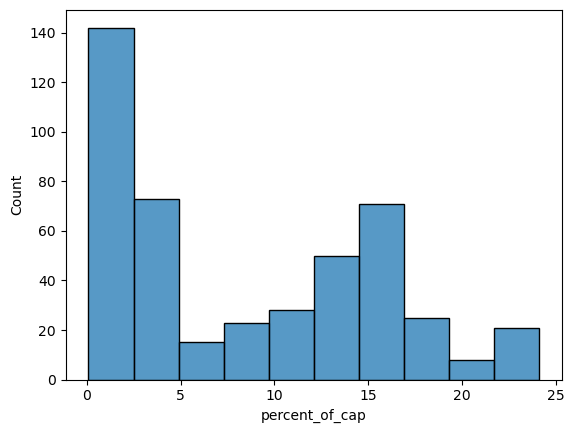

In [114]:
sns.histplot(cap['percent_of_cap'])

<AxesSubplot:xlabel='percent_of_cap'>

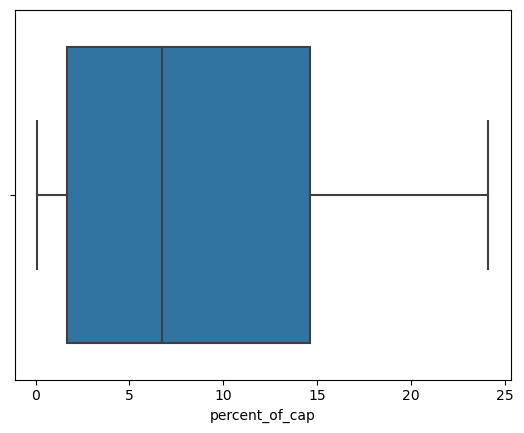

In [115]:
sns.boxplot(data=cap, x='percent_of_cap')

In [116]:
cap.percent_of_cap.quantile(.33)

2.7

In [117]:
cap.percent_of_cap.quantile(.66)

12.9

In [136]:
cap = cap[['name', 'year', 'percent_of_cap']].sort_values(by=['name', 'year']).drop_duplicates('name', keep='last')

In [137]:
cap = cap.merge(combined_df, left_on='name', right_on='player_name')

In [138]:
cap

,name,year,percent_of_cap,player_name,player_commentary
0,Aaron Rodgers,2022,24.1,Aaron Rodgers,rank aaron rodger top 5 playoff performance aa...
1,Alex Smith,2018,13.3,Alex Smith,nfl 5 takeaway washington week 14 win 49er not...
2,Andrew Luck,2016,15.8,Andrew Luck,fan react andrew luck appearance bulldog vs al...
3,Andy Dalton,2022,1.4,Andy Dalton,team andy dalton play nfl journey saint vetera...
4,Baker Mayfield,2022,7.4,Baker Mayfield,nfl fan react yet another interceptionladen pe...
...,...,...,...,...,...
74,Trevor Siemian,2021,0.5,Trevor Siemian,trevor siemian nfl star electrifying performan...
75,Tua Tagovailoa,2020,3.8,Tua Tagovailoa,tua tagovailoa suffer concussion vs packer fan...
76,Tyler Huntley,2021,0.4,Tyler Huntley,tyler huntley prove valuable backup within bal...
77,Tyrod Taylor,2021,3.0,Tyrod Taylor,bill vs texans prediction odd pick october 3 n...


In [139]:
conditions = [
    (cap['percent_of_cap'] < 2.7),
    (cap['percent_of_cap'] >= 2.7) & (cap['percent_of_cap'] < 12.9),
    (cap['percent_of_cap'] >= 12.9)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'mid', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
cap['tier'] = np.select(conditions, values)

# display updated DataFrame
cap.head()

,name,year,percent_of_cap,player_name,player_commentary,tier
0,Aaron Rodgers,2022,24.1,Aaron Rodgers,rank aaron rodger top 5 playoff performance aa...,high
1,Alex Smith,2018,13.3,Alex Smith,nfl 5 takeaway washington week 14 win 49er not...,high
2,Andrew Luck,2016,15.8,Andrew Luck,fan react andrew luck appearance bulldog vs al...,high
3,Andy Dalton,2022,1.4,Andy Dalton,team andy dalton play nfl journey saint vetera...,low
4,Baker Mayfield,2022,7.4,Baker Mayfield,nfl fan react yet another interceptionladen pe...,mid


In [ ]:
cap.drop(columns='name')[['player_name', 'year', 'player_commentary', 'percent_of_cap', 'tier']].to_csv('commentary_cap.csv')

In [140]:
high_words = ' '.join(cap[cap.tier == 'high'].player_commentary)
mid_words = ' '.join(cap[cap.tier == 'mid'].player_commentary)
low_words = ' '.join(cap[cap.tier == 'low'].player_commentary)

unigram_high_words = high_words
unigram_mid_words = mid_words
unigram_low_words = low_words

bi_tri_high_words = high_words
bi_tri_mid_words = mid_words
bi_tri_low_words = low_words

In [141]:
unigram_stopwords = [' game',
                    ' nfl',
                    ' season',
                    ' super',
                    ' bowl',
                    ' quarterback',
                    ' play',
                    ' team',
                    ' I',
                    ' performance',
                    ' year',
                    ' week']

In [142]:
for word in unigram_stopwords:
    unigram_high_words = unigram_high_words.replace(word, '')

    unigram_mid_words = unigram_mid_words.replace(word, '')

    unigram_low_words = unigram_low_words.replace(word, '')

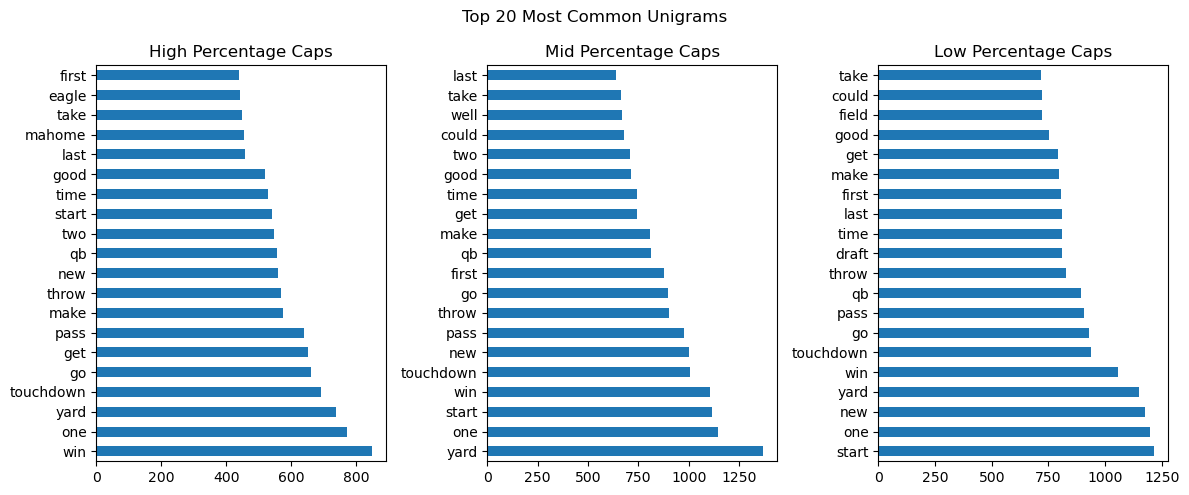

In [143]:
plt.figure(figsize=(12,5))
plt.suptitle('Top 20 Most Common Unigrams')

plt.subplot(131)
pd.Series(unigram_high_words.split()).value_counts().head(20).plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
pd.Series(unigram_mid_words.split()).value_counts().head(20).plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
pd.Series(unigram_low_words.split()).value_counts().head(20).plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

In [149]:
bi_tri_stopwords = [' I', ' blake',
 ' bortle',
 ' cody',
 ' kessler',
 ' mike',
 ' white',
 ' gardner',
 ' minshew',
 ' joe',
 ' flacco',
 ' philip',
 ' river',
 ' ryan',
 ' fitzpatrick',
 ' josh',
 ' rosen',
 ' drew',
 ' lock',
 ' deshaun',
 ' watson',
 ' ben',
 ' roethlisberger',
 ' sam',
 ' darnold',
 ' carson',
 ' palmer',
 ' matt',
 ' barkley',
 ' trevor',
 ' lawrence',
 ' taylor',
 ' heinicke',
 ' jalen',
 ' hurt',
 ' geno',
 ' smith',
 ' marcus',
 ' mariota',
 ' ryan',
 ' tannehill',
 ' patrick',
 ' mahome',
 ' tua',
 ' tagovailoa',
 ' justin',
 ' field',
 ' nick',
 ' mullen',
 ' baker',
 ' mayfield',
 ' david',
 ' blough',
 ' alex',
 ' smith',
 ' brock',
 ' purdy',
 ' daniel',
 ' jones',
 ' jared',
 ' goff',
 ' kirk',
 ' cousin',
 ' tyler',
 ' huntley',
 ' andrew',
 ' luck',
 ' jay',
 ' cutler',
 ' dwayne',
 ' haskin',
 ' aaron',
 ' rodger',
 ' russell',
 ' wilson',
 ' carson',
 ' wentz',
 ' matt',
 ' ryan',
 ' brock',
 ' osweiler',
 ' josh',
 ' mccown',
 ' colin',
 ' kaepernick',
 ' tyrod',
 ' taylor',
 ' cooper',
 ' rush',
 ' mac',
 ' jones',
 ' joe',
 ' burrow',
 ' drew',
 ' stanton',
 ' eli',
 ' manning',
 ' kyle',
 ' allen',
 ' josh',
 ' allen',
 ' dak',
 ' prescott',
 ' matthew',
 ' stafford',
 ' mitchell',
 ' trubisky',
 ' andy',
 ' dalton',
 ' brett',
 ' hundley',
 ' nick',
 ' fole',
 ' tom',
 ' brady',
 ' c.j.',
 ' beathard',
 ' sam',
 ' bradford',
 ' robert',
 ' griffin',
 ' iii',
 ' blaine',
 ' gabbert',
 ' mason',
 ' rudolph',
 ' justin',
 ' herbert',
 ' jamei',
 ' winston',
 ' jimmy',
 ' garoppolo',
 ' brian',
 ' hoyer',
 ' kyler',
 ' murray',
 ' brandon',
 ' allen',
 ' case',
 ' keenum',
 ' jacoby',
 ' brissett',
 ' bryce',
 ' petty',
 ' trevor',
 ' siemian',
 ' jeff',
 ' driskel',
 ' drew',
 ' bree',
 ' tom',
 ' savage',
 ' mike',
 ' glennon',
 ' deshone',
 ' kizer',
 ' teddy',
 ' bridgewater',
 ' zach',
 ' wilson',
 ' derek',
 ' carr',
 ' kenny',
 ' pickett',
 ' cam',
 ' newton',
 ' devlin',
 ' hodge',
 ' davis',
 ' mill',
 ' lamar',
 ' jackson',
 ' poll 0 vote quick link',
 ' follow share show comment',
 ' feedback thank first one comment',
 ' view post instagram',
 ' instagram instagram post',
 ' quote please credit',
 ' w w w',
 ' new england patriot',
 ' new orleans saint', 
 ' new york jet',
 ' kansas city chief',
 ' green bay packer',
 ' san francisco 49er',
 ' tampa bay buccaneer',
 ' los angeles ram',
 ' las vegas raider',
 ' new orleans saints',
 ' new york giants',
 ' new york jets',
 ' los angeles charger',
 ' washington football team',
 ' los angeles rams',
 ' san francisco 49ers',
 ' kansas city chiefs',
 ' carolina panther',
 ' denver broncos',
 ' pittsburgh steeler',
 ' chicago bear',
 ' philadelphia eagle',
 ' buffalo bill',
 ' houston texans',
 ' indianapolis colt',
 ' cleveland brown',
 ' 2023 arnold classic',
 ' mr olympia',
 ' miami dolphin',
 ' jacksonville jaguar',
 ' let take look',
 ' san diego charger',
 ' today2835 80420 yards12 ypa6 tdabsolute masterclass team',
 ' need 10ajmccarron post one great spring football',
 ' dallas cowboy',
 ' seattle seahawks',
 ' baltimore raven',
 ' washington commander',
 ' tennessee titans',
 ' detroit lion',
 ' arizona cardinal',
 ' lebron james',
 ' golden state warrior',
 ' new york giant',
 ' prime videoalso available',
 ' nfl nfl november 18 2022',
 ' gmt18 nov 2022',
 ' yard one touchdown',
 ' yard two touchdown',
 ' yard three touchdown',
 ' yard four touchdown',
 ' mccarron statline time performance',
 ' l l l',
 ' nation jason kelce say still beat', 
 ' sb loss speak still',
 ' twittercomjameslarsenpfnjame larsenjameslarsenpfnaj xfl',
 ' 2022 nfl season',
 ' 2021 nfl season',
 ' 2020 nfl season',
 ' 2022 nfl season',
 ' 20202021 nfl season',
 ' 2022 nfl draft',
 ' 2021 nfl draft',
 ' minnesota viking',
 ' ohio state',
 ' week 1']

In [150]:
for word in bi_tri_stopwords:
    bi_tri_high_words = bi_tri_high_words.replace(word, '')
    bi_tri_mid_words = bi_tri_mid_words.replace(word, '')
    bi_tri_low_words = bi_tri_low_words.replace(word, '')

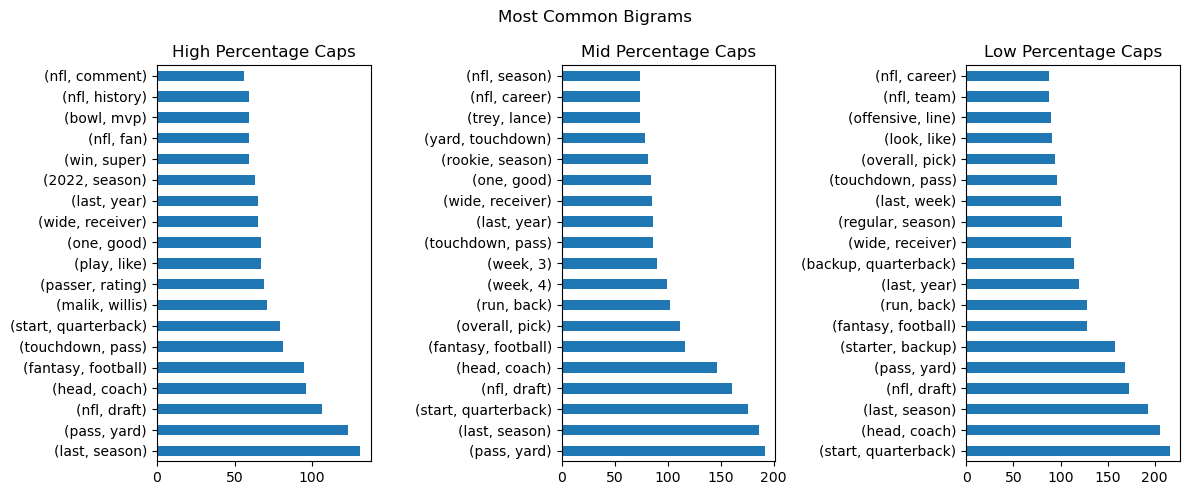

In [151]:
plt.figure(figsize=(12,5))
plt.suptitle('Most Common Bigrams')

plt.subplot(131)
top_20_bigrams_high = (pd.Series(nltk.ngrams(bi_tri_high_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_high[1:20].plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
top_20_bigrams_mid = (pd.Series(nltk.ngrams(bi_tri_mid_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_mid[1:20].plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
top_20_bigrams_low = (pd.Series(nltk.ngrams(bi_tri_low_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_low[1:20].plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

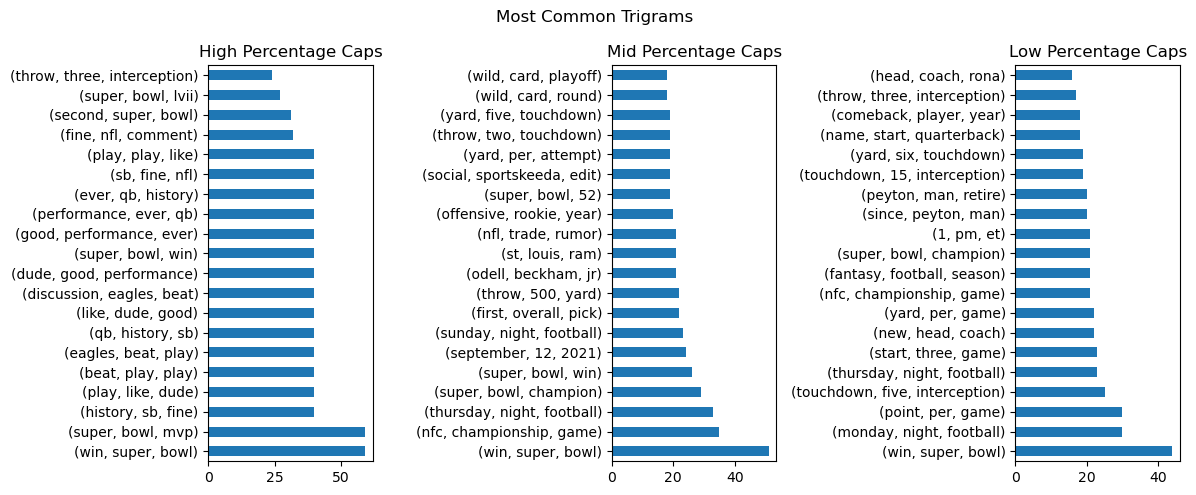

In [152]:
plt.figure(figsize=(12,5))
plt.suptitle('Most Common Trigrams')

plt.subplot(131)
top_20_trigrams_high = (pd.Series(nltk.ngrams(bi_tri_high_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_high.plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
top_20_trigrams_mid = (pd.Series(nltk.ngrams(bi_tri_mid_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_mid.plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
top_20_trigrams_low = (pd.Series(nltk.ngrams(bi_tri_low_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_low.plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

# Sentiment Analysis

In [153]:
#Initialize Sentiment Analyzer

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [154]:
#Analyze sentiment based on raw, pre-processed commentary

cap['sentiment'] = combined_df['player_commentary'].apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [155]:
cap

,name,year,percent_of_cap,player_name,player_commentary,tier,sentiment
0,Aaron Rodgers,2022,24.1,Aaron Rodgers,rank aaron rodger top 5 playoff performance aa...,high,1.0000
1,Alex Smith,2018,13.3,Alex Smith,nfl 5 takeaway washington week 14 win 49er not...,high,0.9995
2,Andrew Luck,2016,15.8,Andrew Luck,fan react andrew luck appearance bulldog vs al...,high,1.0000
3,Andy Dalton,2022,1.4,Andy Dalton,team andy dalton play nfl journey saint vetera...,low,0.9997
4,Baker Mayfield,2022,7.4,Baker Mayfield,nfl fan react yet another interceptionladen pe...,mid,1.0000
...,...,...,...,...,...,...,...
74,Trevor Siemian,2021,0.5,Trevor Siemian,trevor siemian nfl star electrifying performan...,low,0.9998
75,Tua Tagovailoa,2020,3.8,Tua Tagovailoa,tua tagovailoa suffer concussion vs packer fan...,mid,0.9997
76,Tyler Huntley,2021,0.4,Tyler Huntley,tyler huntley prove valuable backup within bal...,low,0.9999
77,Tyrod Taylor,2021,3.0,Tyrod Taylor,bill vs texans prediction odd pick october 3 n...,mid,0.9999


In [ ]:
cap.to_csv('sentiment_scores.csv')

In [156]:
#Checking to see difference among tiers

cap.groupby('tier').mean('sentiment')

,year,percent_of_cap,sentiment
tier,,,
high,2020.000000,18.765000,0.999855
low,2019.676471,1.008824,0.943041
mid,2019.880000,5.800000,0.999908


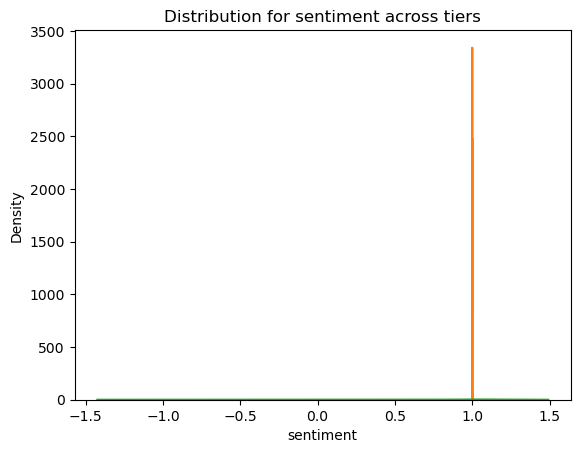

In [157]:
# is the distribution for sentiment different for different tiers

sns.kdeplot(cap[cap.tier=='high'].sentiment, label='high')
sns.kdeplot(cap[cap.tier=='mid'].sentiment, label='mid')
sns.kdeplot(cap[cap.tier=='low'].sentiment, label='low')

#plt.legend(['high', 'mid', 'low'])
plt.title("Distribution for sentiment across tiers")
plt.show()

# Topic Modeling

In [158]:
import gensim

In [159]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [160]:
import spacy
from nltk.corpus import stopwords

In [161]:
import pyLDAvis
import pyLDAvis.gensim

In [162]:
import numpy as np

In [163]:
import warnings

In [164]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [165]:
def topic_modeling(commentary):
    for word in unigram_stopwords:
        commentary = commentary.replace(word, '')
    for word in bi_tri_stopwords:
        commentary = commentary.replace(word, '')
    return commentary

In [166]:
texts = cap.player_commentary

In [167]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(texts)

print(data_words[0][0:20])

['rank', 'aaron', 'rodger', 'top', 'playoff', 'performance', 'aaron', 'rodger', 'one', 'great', 'quarterback', 'nfl', 'history', 'good', 'ratio', 'time', 'second', 'nfl', 'mvp', 'award']


In [168]:
#Bigrams and Trigrams

bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return(bigram[doc] for doc in texts)

def make_trigrams(texts):
    return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = list(make_trigrams(data_bigrams))

print(data_bigrams_trigrams[0])

['rank', 'aaron_rodger', 'top', 'playoff', 'performance', 'aaron_rodger', 'one', 'great', 'quarterback', 'nfl', 'history', 'good', 'ratio', 'time', 'second', 'nfl', 'mvp', 'award', 'ever', 'super_bowl_champion', 'consistently', 'put', 'performance', 'show', 'one', 'good', 'quarterback', 'nfl', 'aaron_rodger', 'many', 'memorable', 'performance', 'legendary', 'career', 'playoff', 'always', 'prove', 'even', 'special', 'regular', 'season', 'legacy', 'purpose', 'stake', 'high', 'roger', 'regularly', 'deliver', 'matter', 'five', 'good', 'postseason', 'performance', 'career', 'aaron_rodger', 'top', 'five', 'postseason', 'performance', 'nfc', 'divisional', 'playoff', 'green_bay_packer', 'vs', 'dallas_cowboy', 'aaron_rodger', 'lead', 'green_bay_packer', 'victory', 'dallas_cowboy', 'lambeau_field', 'divisional_round', 'nfl', 'playoff', 'trail', 'late', 'third', 'quarter', 'take', 'throw', 'two', 'unanswered', 'touchdown', 'pass', 'win', 'game', 'rodger', 'throw', 'yard', 'three', 'touchdown', 'i

In [169]:
#TF-IDF Removal

from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03

words = []

words_missing_in_tfidf = []

for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value > low_value]
    drops = low_value_words + words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf score 0 will be missing
    
    new_bow = [b for b in bow if b[0 not in low_value_words and b[0] not in words_missing_in_tfidf]]
    corpus[i] = new_bow

[(0, 1), (1, 3), (2, 2), (3, 121), (4, 10), (5, 6), (6, 5), (7, 1), (8, 12), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 2), (17, 12), (18, 2), (19, 8)]


In [170]:
# id2word = corpora.Dictionary(data_words)

# corpus = []

# for text in data_words:
#     new = id2word.doc2bow(text)
#     corpus.append(new)
    
# print(corpus[0][0:20])

In [173]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word = id2word,
                                           num_topics = 5,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')

In [174]:
#Visualization

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model,
                              corpus,
                              id2word,
                              mds="mmds",
                              R=30)

vis

/usr/local/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.022645 -0.037579       1        1  39.521670
1     -0.005123  0.023005       2        1  27.928704
0     -0.031734 -0.062911       3        1  12.880366
3     -0.075115  0.024709       4        1  12.288029
4      0.089327  0.052777       5        1   7.381231, topic_info=             Term         Freq        Total Category  logprob  loglift
101        backup  1028.000000  1028.000000  Default  30.0000  30.0000
856           nfl  5583.000000  5583.000000  Default  29.0000  29.0000
1007  quarterback  5334.000000  5334.000000  Default  28.0000  28.0000
893           one  3040.000000  3040.000000  Default  27.0000  27.0000
523          game  5786.000000  5786.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1286        throw   124.106384  2238.242282   Topic5  -5.5562  -0.2861
763          make   119.751732  2216.977604   Topic5  -5.5920  -0.3122
1195        start   121.276668  2807.168956   Topic5  -5.5793  -0.5356
1398         well   115.602723  1706.746293   Topic5  -5.6272  -0.0860
270         could   115.149536  1678.868763   Topic5  -5.6311  -0.0734

[455 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
3          1  0.229956            aaron_rodger
3          2  0.585079            aaron_rodger
3          3  0.122255            aaron_rodger
3          4  0.043663            aaron_rodger
3          5  0.020376            aaron_rodger
...      ...       ...                     ...
8495       4  0.132017             zach_wilson
8495       5  0.002589             zach_wilson
13164      1  0.938613       zach_wilson_bench
4996       1  0.928191  zach_wilson_joe_flacco
4996       2  0.044200  zach_wilson_joe_flacco

[939 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])